In [1]:
!pip install bnlp_toolkit

  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=e915ceb8ad

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import BengaliCorpus as corpus
from bnlp import CleanText
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_excel('/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx')

In [4]:
train_df

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust
...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger


In [5]:
train_df.dropna(inplace=True)

In [6]:
train_df = train_df.drop_duplicates()

In [7]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1093


In [8]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['TEXT'] = train_df['TEXT'].apply(clean_text)

In [9]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1120


In [10]:
from bnlp import BengaliCorpus as corpus

stop_words = set(corpus.stopwords)

In [11]:
stopwords_length = len(stop_words)

print("Number of stopwords:", stopwords_length)

Number of stopwords: 398


In [12]:
for stopword in stop_words:
    print(stopword)

বার
তারৈ
তুমি
অনেকেই
বিভিন্ন
কোন
ওকে
অনেকে
সেখানে
আগেই
ঠিক
সব
এটি
মধ্যেই
বদলে
হয়েছিল
দ্বারা
গিয়ে
স্বয়ং
তাতে
মাত্র
কিছুই
বসে
টি
তাঁর
কেউই
ভাবে
পারেন
না
আরও
এবং
র
তবে
দুটো
এখন
আজ
এল
তাকে
একটি
কখনও
হবেন
দেওয়ার
দু
ঐ
কিংবা
করতে
দিন
পারে
রকম
মাধ্যমে
মধ্যভাগে
যাতে
যাওয়া
বেশ
আদ্যভাগে
করলে
করিয়া
ছিলেন
আছে
পেয়ে
থাকবেন
কত
গেলে
বলেন
দিয়েছেন
মনে
ধরে
হলো
যখন
হয়
সঙ্গেও
করিয়ে
মধ্যে
হলে
পর
অথবা
হয়নি
তাঁাহারা
চান
দেখতে
ই
করবেন
তাহাতে
সেটাও
সামনে
কিছু
বিনা
দুই
তাঁদের
থেকে
তাহলে
হওয়ায়
আমার
কেন
ফের
আপনি
চালু
যাদের
এমনি
হওয়ার
ফলে
জানা
যাচ্ছে
নিয়ে
জন্য
অবধি
প্রায়
কবে
কয়েক
নিতে
হয়
এখানেই
পরেও
রাখা
সহিত
হবে
যেমন
তাহার
ফিরে
ওখানে
নেই
বলে
অন্তত
আমাকে
দিয়ে
এই
করায়
ইত্যাদি
জনের
মোট
সাধারণ
ওই
এরা
হইয়া
করছেন
করার
যদি
করি
অনেক
সেই
বন
তত
হাজার
নেওয়া
সম্প্রতি
করেছিলেন
বললেন
হয়ে
সহ
কাজে
তাহা
ব্যাপারে
যাওয়া
নানা
পরে
হোক
ধরা
আমরা
তবু
জানিয়েছে
থেকেও
ও
তাঁকে
সমস্ত
সেখান
ক্ষেত্রে
দেয়
নিজের
করবে
সেটি
বিষয়টি
থাকে
সেটাই
জ্নজন
যদিও
জানতে
দিলেন
আগামী
চায়
জানায়
প্রভৃতি
নয়
দেখা
তা
হন
বলতে
তেমন
দুটি
একই
তাই

In [13]:
stopwords_to_keep = {'অতএব', 'অথচ', 'অবধি', 'অর্থাত', 'আই', 'আর', 'আরও', 'ই', 'ইহা', 
                     'এ', 'এই', 'একই', 'একে', 'এটা', 'এটাই', 'এত', 'এতে', 'এব', 'এর', 
                     'এস', 'ঐ', 'ও', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওর', 'ওরা', 'কমনে', 
                     'করা', 'করাই', 'করায়', 'করিয়ে', 'করেই', 'কাছ', 'কারও', 'কি', 'কিংবা',
                     'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'ছাড়াও', 'জন্যওজে', 'জানিয়েছে', 
                     'জে', 'জ্নজন', 'টি', 'তত', 'তা', 'তাঁাহারা', 'তাই', 'তাও', 'তাতে', 
                     'তারৈ', 'তাহা', 'তাহাতে', 'তিনঐ', 'তুলে', 'তো', 'দু', 'ধামার', 'পরেই', 
                     'পাচ', 'পি', 'পেয়্র্', 'প্রযন্ত', 'ফের', 'বরং', 'বহু', 'বা', 'বি', 'মোটেই',
                     'যা', 'যে', 'র', 'সহ', 'সহিত', 'সি', 'সে', 'সেই', 'সেটাই', 'স্বয়ং',
                     'হত', 'হতেই', 'হন', 'হয়েই', 'হয়নি', 'হতেই'}


filtered_stop_words = stop_words.intersection(stopwords_to_keep)

In [14]:
stopwords_length = len(filtered_stop_words)

print("Number of filtered stopwords :", stopwords_length)

Number of filtered stopwords : 89


In [15]:
for stopword in filtered_stop_words:
    print(stopword)

তারৈ
ফের
জন্যওজে
করা
কাছ
ওকে
পাচ
অবধি
এত
কী
বি
ওঁরা
সহিত
পি
যা
একে
স্বয়ং
অর্থাত
তাতে
টি
আই
তাও
কেউই
হয়েই
এই
করায়
আরও
তুলে
এর
ওই
র
কারও
পেয়্র্
পরেই
তিনঐ
সেই
ইহা
তত
দু
এতে
ঐ
কিংবা
সহ
সি
করাই
হত
ওঁর
জে
বহু
তাহা
অতএব
জানিয়েছে
ও
যে
তো
বা
কি
সেটাই
জ্নজন
ওরা
কেখা
এব
করিয়ে
হয়নি
প্রযন্ত
তাঁাহারা
তা
হন
ই
হতেই
ধামার
একই
কে
তাই
কমনে
তাহাতে
আর
করেই
এস
ছাড়াও
অথচ
ওর
এটাই
বরং
সে
মোটেই
কেউ
এটা
এ


In [16]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove stopwords
def remove_stopwords(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in filtered_stop_words]
    return ' '.join(filtered_words)

train_df['Text_After_Removing'] = train_df['TEXT'].apply(remove_stopwords)

In [17]:
train_df

,TEXT,classes,Text_After_Removing
0,নাইমা কি করবেন আমরা জানি,sadness,নাইমা করবেন আমরা জানি
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,ভাই সব আপনাদের খুব ভাল লাগছে
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,বর্তমানে মুসলমান মারে জন জন হয়েছে ঈশ্বর
...,...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক মহামা...
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের ...,joy,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger,কিরে মিথ্যা কথা কস কেন গতদিন আমি আসিফ আসছি খালি


In [18]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(train_df['Text_After_Removing'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
অপশনও    0.000039
অবতরণ    0.000045
অবসরপ    0.000026
অমলপ     0.000049
অলকবন    0.000030
           ...   
হরণস     0.000049
হরম      0.000043
হলও      0.000044
ৎন       0.000041
ৎসব      0.000043
Length: 299, dtype: float64


In [19]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

train_df['Final_Text'] = train_df['Text_After_Removing'].apply(remove_less_important_words)

In [20]:
train_df

,TEXT,classes,Text_After_Removing,Final_Text
0,নাইমা কি করবেন আমরা জানি,sadness,নাইমা করবেন আমরা জানি,নাইমা করবেন আমরা জানি
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,ভাই সব আপনাদের খুব ভাল লাগছে,ভাই সব আপনাদের খুব ভাল লাগছে
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,বর্তমানে মুসলমান মারে জন জন হয়েছে ঈশ্বর,বর্তমানে মুসলমান মারে জন জন হয়েছে ঈশ্বর
...,...,...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক মহামা...,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক মহামা...
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের ...,joy,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger,কিরে মিথ্যা কথা কস কেন গতদিন আমি আসিফ আসছি খালি,কিরে মিথ্যা কথা কস কেন গতদিন আমি আসিফ আসছি খালি


In [21]:
longest_string = max(train_df["Final_Text"], key=len)
print(len(longest_string))

987


In [22]:
train_df["classes"].value_counts()

classes
joy         1453
disgust     1334
sadness     1303
anger       1037
fear         951
surprise     759
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2,stratify=train_df['classes'],
                                     random_state=42)

In [24]:
X_train  =  train_df['Final_Text'].values.tolist()
y_train = train_df['classes'].tolist()

In [25]:
X_test =  test_df['Final_Text'].values.tolist()
y_test = test_df['classes'].tolist()

In [26]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 17.3

In [27]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [28]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 20
	95percentile : 38
	99percentile : 53


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 20
	95percentile : 37
	99percentile : 49


In [29]:
print(trn)

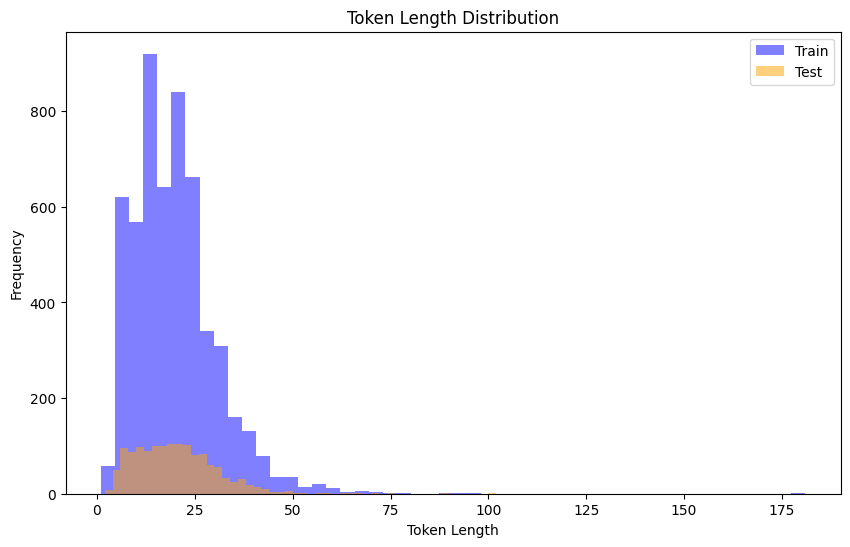

In [30]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [31]:
model = t.get_classifier()

In [32]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [33]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [34]:
history = learner.fit_onecycle (2e-5, 16, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/16
684/684 [==============================] - 415s 572ms/step - loss: 1.6746 - accuracy: 0.3513 - val_loss: 1.3632 - val_accuracy: 0.5175
Epoch 2/16
684/684 [==============================] - 388s 567ms/step - loss: 1.1241 - accuracy: 0.6023 - val_loss: 0.9433 - val_accuracy: 0.6513
Epoch 3/16
684/684 [==============================] - 388s 567ms/step - loss: 0.7842 - accuracy: 0.7179 - val_loss: 0.9004 - val_accuracy: 0.6615
Epoch 4/16
684/684 [==============================] - 388s 567ms/step - loss: 0.5999 - accuracy: 0.7831 - val_loss: 0.9254 - val_accuracy: 0.6718
Epoch 5/16
684/684 [==============================] - 388s 567ms/step - loss: 0.4679 - accuracy: 0.8307 - val_loss: 0.9647 - val_accuracy: 0.6820
Epoch 6/16
684/684 [==============================] - 388s 567ms/step - loss: 0.3469 - accuracy: 0.8815 - val_loss: 1.2136 - val_accuracy: 0.6520
Epoch 7/16
684/684 [==============================] - 388s 56

In [35]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [36]:
classes=t.get_classes()

In [37]:
cm = learner.validate(class_names=t.get_classes())

43/43 [==============================] - 10s 172ms/step
              precision    recall  f1-score   support

       anger       0.63      0.58      0.61       207
     disgust       0.49      0.68      0.57       267
        fear       0.85      0.71      0.77       190
         joy       0.81      0.84      0.82       291
     sadness       0.79      0.57      0.66       261
    surprise       0.61      0.62      0.62       152

    accuracy                           0.68      1368
   macro avg       0.70      0.67      0.67      1368
weighted avg       0.70      0.68      0.68      1368

